In [7]:
%pip install tensorflow

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

Note: you may need to restart the kernel to use updated packages.


In [8]:
train_data = pd.read_csv('Train.csv')
print("Shape of train_data:", train_data.shape)


X = train_data.iloc[:, 1:]  
y = train_data.iloc[:, 0]   

print("Shape of X after separating features:", X.shape)

Shape of train_data: (42000, 785)
Shape of X after separating features: (42000, 784)


In [9]:
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)  
X = X.values / 255.0
X = X.reshape(-1, 28, 28, 1)
print("Shape of X after reshaping:", X.shape)

Shape of X after reshaping: (42000, 28, 28, 1)


In [10]:
y = to_categorical(y, num_classes=10)
print("Shape of y after one-hot encoding:", y.shape)

Shape of y after one-hot encoding: (42000, 10)


In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)

X_train shape: (33600, 28, 28, 1)


In [13]:
from tensorflow.keras.layers import Input

model = Sequential([Input(shape=(28, 28, 1)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3065 - accuracy: 0.9106 - val_loss: 0.1732 - val_accuracy: 0.9487
Epoch 2/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1279 - accuracy: 0.9611 - val_loss: 0.1198 - val_accuracy: 0.9642
Epoch 3/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0863 - accuracy: 0.9731 - val_loss: 0.1076 - val_accuracy: 0.9680
Epoch 4/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0671 - accuracy: 0.9785 - val_loss: 0.0947 - val_accuracy: 0.9726
Epoch 5/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0485 - accuracy: 0.9846 - val_loss: 0.1039 - val_accuracy: 0.9695
Epoch 6/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0414 - accuracy: 0.9866 - val_loss: 0.1223 - val_accuracy: 0.9645
Epoch 7/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0323 - accuracy: 0.9896 - val_loss: 0.1113 - val_accuracy:

263/263 [==============================] - 0s 1ms/step - loss: 0.1098 - accuracy: 0.9739
Validation Accuracy: 97.39%


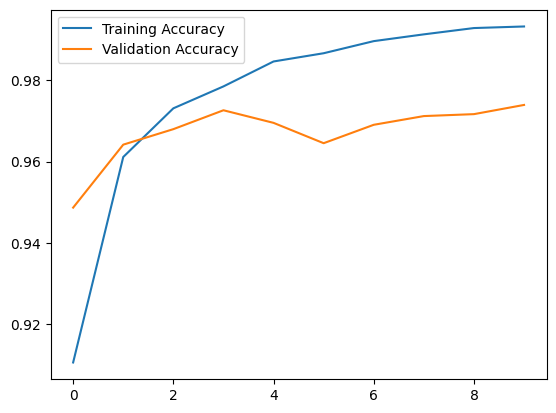

In [15]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

175/175 [==============================] - 0s 1ms/step


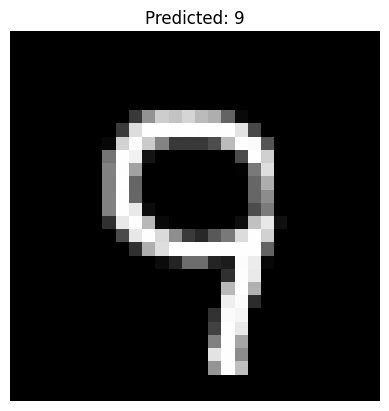

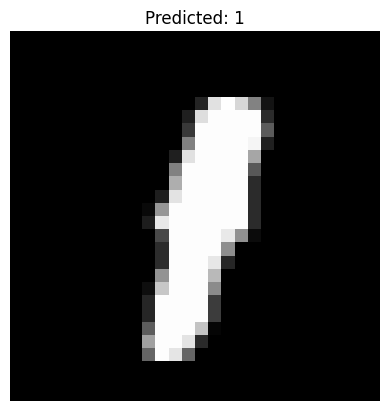

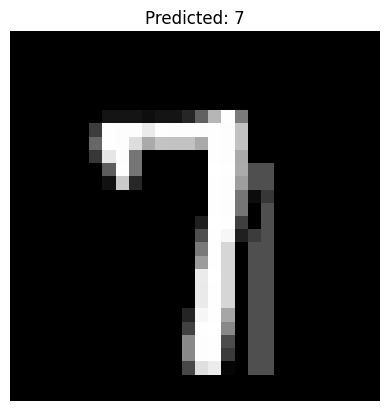

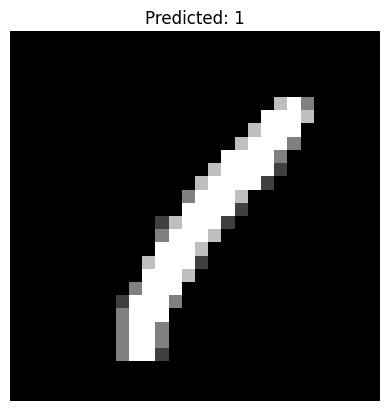

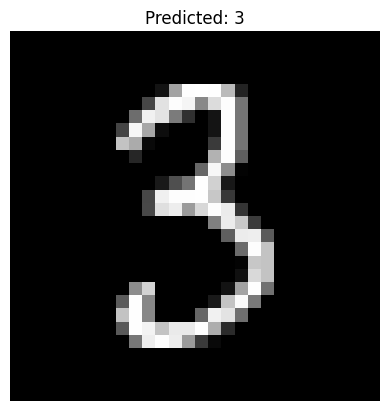

In [16]:
test_data = pd.read_csv('test.csv')
X_test = test_data.values / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()